# Aula 1

## Introdução ao OCR

### O que é o OCR? 

OCR, que em inglês é chamado de Optical Character Recognition e tem a sua tradução para Reconhecimento de Caractere Óptico, e dá se ao processo que converte uma imagem de texto em um formato de texto legível por máquina

### Como o OCR funciona?
* Aquisição da imagem
* Pré-processamento
* Reconhecimento de texto
  - Reconhecimento de padrões
  - Detecção de recursos
* Pós-processamento



Existem diversas ferramentas disponíveis para serem utilizadas e nós vamos utilizar o [`pytesseract`](https://pypi.org/project/pytesseract/), que é uma biblioteca do Python que permite com que possamos utilizar o [`Tesseract OCR`](https://tesseract-ocr.github.io/), que é um recurso open source da Google e funciona com a OCR Engine. Por ser um recurso open source tem um [`repositório no GitHub`](https://github.com/tesseract-ocr/tesseract), e mais de 100 línguas no seu vocabulário, além de ser possível fazer com que ele aprenda novas linguagens.

## OCR no Colab

As bibliotecas não são instaladas previamente no Google Colaboratory, então é necessário que a instalação seja feita utilizando o pip.



```
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9
```

E os dados utilizados no curso serão importados utilizando o `!git clone` da pasta [`text-recognize`](https://github.com/sthemonica/text-recognize), afim de facilitar a importação de arquivos.

In [2]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:

In [3]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


In [4]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow # para mostrar as imagens no Google Colab

In [5]:
pytesseract.__version__

'0.3.9'

In [6]:
cv2.__version__

'4.6.0'

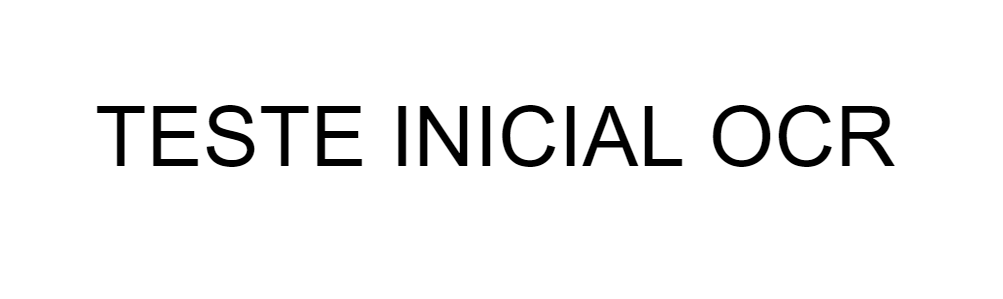

In [7]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

In [8]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



## Imagens BGR


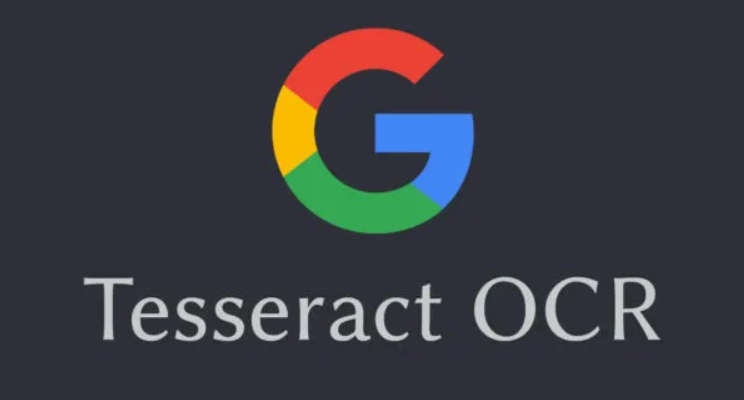

In [9]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

O OpenCV tem seus canais de cores invertidos, então para utilizarmos com outras bibliotecas precisamos fazer a conversão de BGR para RGB. 
Existem outros tipos de conversões que podem ser feitas e a lista pode ser acessada no site da [documentação do OpenCV](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html).

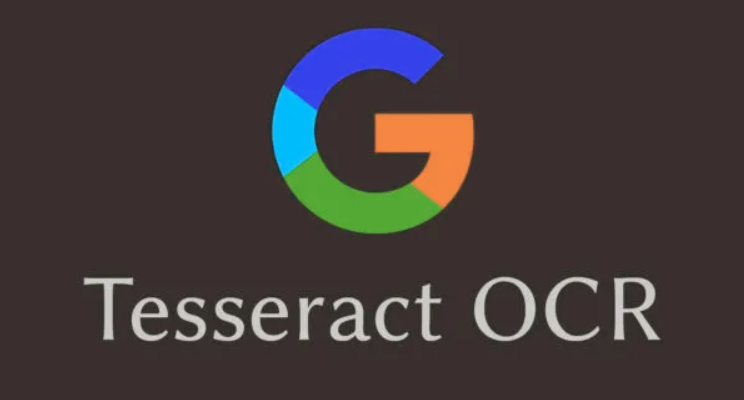

In [10]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

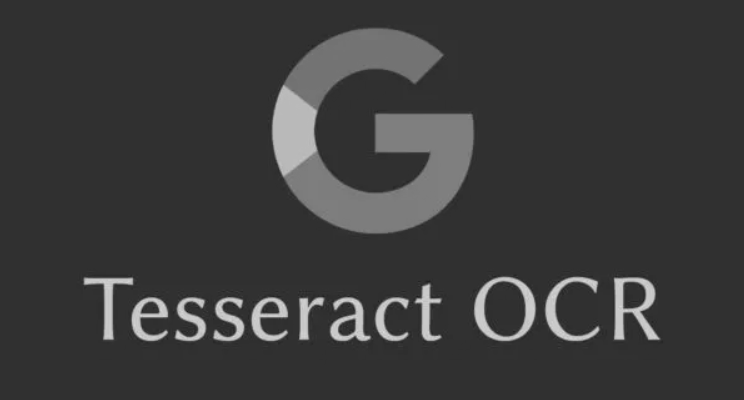

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [12]:
texto = pytesseract.image_to_string(rgb)
print(texto)

c

Tesseract OCR



In [13]:
texto = pytesseract.image_to_string(gray)
print(texto)

C

Tesseract OCR



# Aula 2

## Caracteres diferentes

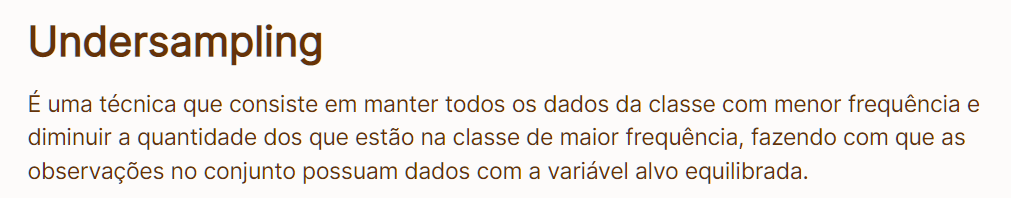

In [14]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [15]:
texto = pytesseract.image_to_string(rgb)
print(texto)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



As palavras **frequência**, **estão** e **observações** não conseguiram ser traduzidas de uma forma boa o suficiente, o que nos faz pensar que o Tesseract está com algum problema e vamos verificar quais as listas de línguas que estão instaladas atualmente no sistema para auxiliar na leitura das nossas imagens, para isso usamos:

```
!tesseract --list-langs
```

In [16]:
!tesseract --list-langs

List of available languages (3):
osd
eng
por


In [17]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [18]:
!tesseract --list-langs

List of available languages (3):
osd
eng
por


Agora já temos o português instalado e podemos passar novamente a imagem e definir que ela seja "lida" pelo Tesseract usando o português, para isso contamos com o  método `lang`.

In [19]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



## Desafio - Pasta com as línguas usadas no projeto

Para um projeto maior, ao invés de importarmos todas as vezes da forma que fizemos anteriormente com o `!apt-get install tesseract-ocr-por`podemos fazer uma pasta dentro do Google Colab e baixar diretamente do [GitHub do Tesseract os modelos já treinados em determinados idiomas](https://github.com/tesseract-ocr/tessdata), então se por algum acaso eu esteja trabalhando com imagens que tenham **italiano**, posso ter esse modelo na pasta e apenas utilizá-lo.


In [25]:
!mkdir tessdata

In [26]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2022-08-09 20:43:11--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-08-09 20:43:12--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2022-08-09 20:43:12--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [27]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [28]:
!ls tessdata/

eng.traineddata  por.traineddata


## PSM

Page Segmentation Mode (PSM) ou em uma tradução livre modos de segmentação de página.

```
!tesseract --help-psm
```

In [29]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


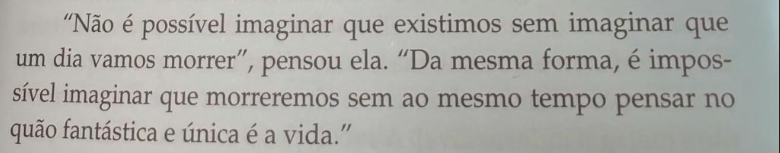

In [30]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [31]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [32]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [33]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

In [34]:
config_tesseract = '--tessdata-dir tessdata --psm 8'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªfâ%êããããââª%%?ªííÉ:D;Z:Én:gíríãrgâgíie::ugfâ|



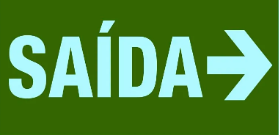

In [35]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-Saida.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [36]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDAS



## Biblioteca Pillow

Biblioteca Pillow, que é mais conhecida pelo seu nome antigo, **PIL**: Python Imaging Library. 

**Método utilizado:**

```
pytesseract.image_to_osd()
```


OSD significa Orientation and Script Detection e o seu retorno são os "metadados" da imagem.

# Aula 3

## Selecionando textos

## Caixa delimitadora

## Caixa e texto

## Fontes

## Função para fontes

# Aula 4

## Busca de informações

## Destaque de informações

## Cenários naturais

## Falsos positivos